In [12]:
#import sys
#sys.path.insert(0,"/workspace/bt")

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from strategy import *

%matplotlib inline

In [13]:
tickers = ['TQQQ','TMF']

In [14]:
data = yf.download(tickers, end='2022-12-10')['Adj Close']
data = data[tickers]
for c in data.columns:
    print(c, data[c].first_valid_index())
assets = data.dropna().copy()

start_day = assets.index.min() + pd.DateOffset(months=12) - pd.DateOffset(days=1)
print('asset \n', assets.head(30))
print('start day : ', start_day)

[*********************100%***********************]  2 of 2 completed
TQQQ 2010-02-11 00:00:00
TMF 2009-04-16 00:00:00
asset 
                 TQQQ       TMF
Date                          
2010-02-11  0.431471  6.695425
2010-02-12  0.433238  6.771189
2010-02-16  0.450019  6.831800
2010-02-17  0.457656  6.613166
2010-02-18  0.466332  6.500600
2010-02-19  0.466332  6.602342
2010-02-22  0.463059  6.552554
2010-02-23  0.444979  6.870764
2010-02-24  0.458435  6.888082
2010-02-25  0.458175  7.013636
2010-02-26  0.463890  7.117541
2010-03-01  0.483788  7.117541
2010-03-02  0.486698  7.080741
2010-03-03  0.489399  7.015800
2010-03-04  0.494802  7.115376
2010-03-05  0.516675  6.827470
2010-03-08  0.519428  6.734389
2010-03-09  0.528624  6.743047
2010-03-10  0.541560  6.695425
2010-03-11  0.546548  6.749543
2010-03-12  0.547795  6.885917
2010-03-15  0.544106  6.879424
2010-03-16  0.554392  7.033116
2010-03-17  0.558236  7.113211
2010-03-18  0.563900  7.050434
2010-03-19  0.553925  7.069917
2010-0

In [22]:
# 상대모멘텀 백테스트
def RelativeMomentum_BT1(assets, rank, months, start_day, run_on_end_of_period=False, lag=1, name='Relative Momentum'):
    s = bt.Strategy(name, [bt.algos.RunAfterDate(start_day),
                           bt.algos.RunQuarterly(run_on_first_date=False, run_on_end_of_period=run_on_end_of_period, run_on_last_date=False),
                           #bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}'),
                           #bt.algos.PrintDate(),
                           bt.algos.SelectAll(),
                           bt.algos.StatTotalReturn(lookback=pd.DateOffset(months=months), lag=pd.DateOffset(days=lag)),
                           bt.algos.SelectN(rank, sort_descending=True),
                           bt.algos.WeighEqually(),
                           #bt.algos.PrintTempData(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, assets, initial_capital=100000000.0)

In [23]:
# 상대모멘텀 백테스트
def RelativeMomentum_BT2(assets, rank, months, start_day, run_on_end_of_period=False, lag=1, name='Relative Momentum'):
    s = bt.Strategy(name, [bt.algos.RunAfterDate(start_day),
                           bt.algos.RunQuarterly(run_on_first_date=False, run_on_end_of_period=run_on_end_of_period, run_on_last_date=False),
                           #bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}'),
                           #bt.algos.PrintDate(),
                           bt.algos.SelectAll(),
                           bt.algos.SelectMomentum(rank, lookback=pd.DateOffset(months=months), lag=pd.DateOffset(days=lag)),
                           bt.algos.WeighEqually(),
                           #bt.algos.PrintTempData(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, assets, initial_capital=100000000.0)

In [24]:
# 상대모멘텀 상위 1종목 (1~12개월 비교)
relativemomentum = {}
for i in range(0, 12):
    relativemomentum[i] = RelativeMomentum_BT2(assets[tickers], 1, i+1, start_day, False, 1, name='RM({})'.format(str(i+1)))
    
rm1_report = bt.run(*relativemomentum.values())

<AxesSubplot:title={'center':'Relative Momentum (1~12 month) with rank 1'}>

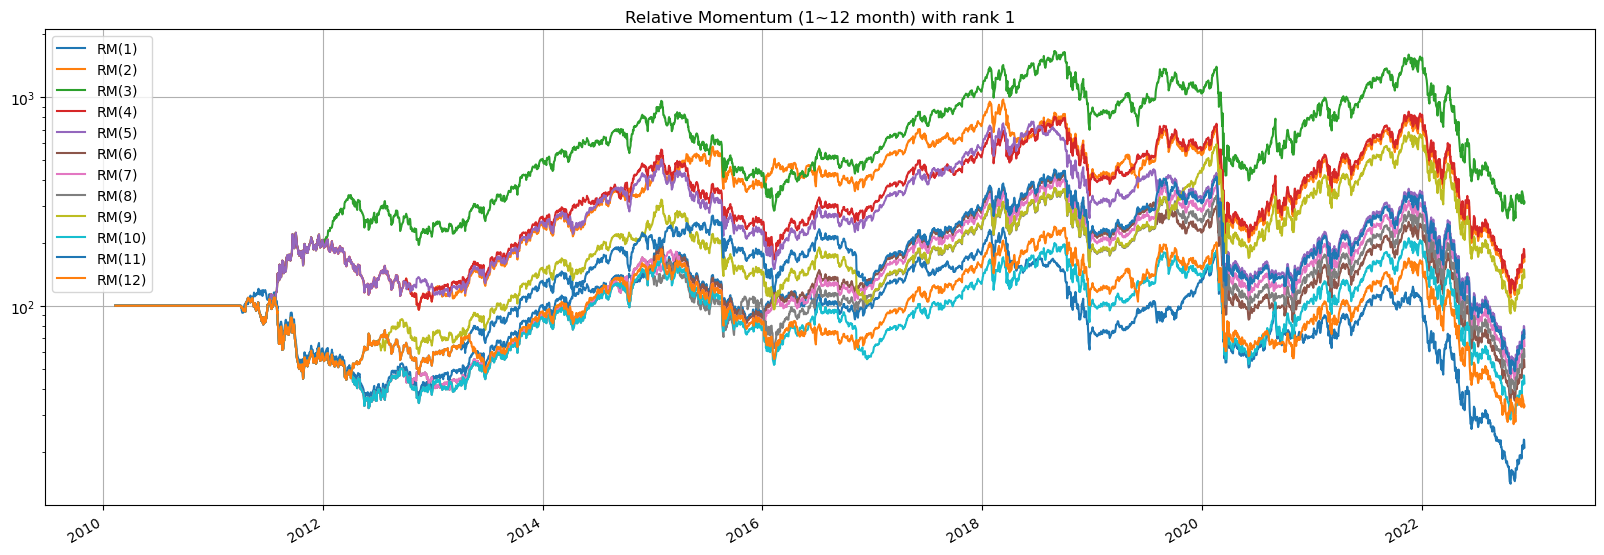

In [25]:
rm1_report.plot(figsize=(20,7), grid=True, logy=True, title="Relative Momentum (1~12 month) with rank 1")

In [26]:
print(rm1_report.prices[start_day:].calc_stats().display())

Stat                 RM(1)       RM(2)       RM(3)       RM(4)       RM(5)       RM(6)       RM(7)       RM(8)       RM(9)       RM(10)      RM(11)      RM(12)
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2011-02-10  2011-02-10  2011-02-10  2011-02-10  2011-02-10  2011-02-10  2011-02-10  2011-02-10  2011-02-10  2011-02-10  2011-02-10  2011-02-10
End                  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         -79.06%     63.39%      212.18%     71.87%      -26.63%     -49.07%     -35.86%     -42.93%     37.08%      -57.48%     -29.59%     -67.03%
Daily Sharpe         0.06  